# CHEM 1000 - Fall 2020
Prof. Geoffrey Hutchison, University of Pittsburgh

## 1. Functions and Coordinate Sets

Chapter 1 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Handle 2D polar and 3D spherical coordinates
- Understand area elements in 2D polar coordinates
- Understand volume eleements in 3D spherical coordinates

### X/Y Cartesian 2D Coordinates

We've already been using the x/y 2D Cartesian coordinate set to plot functions;

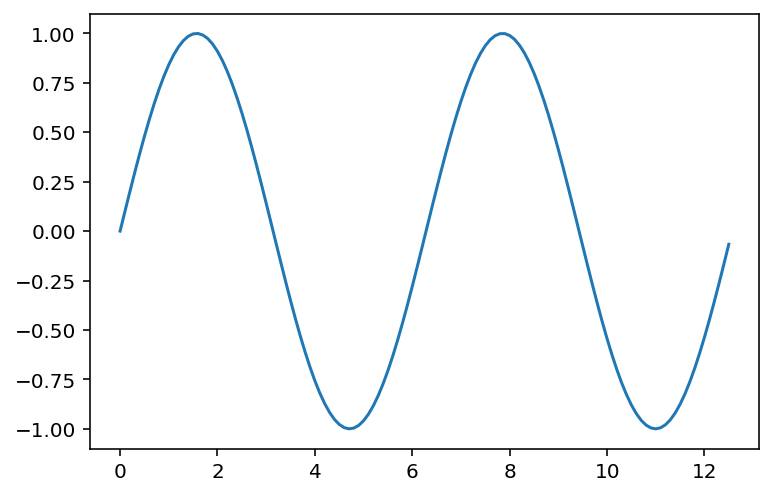

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# insert any graphs into our notebooks directly
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

x = np.arange(0, 4*np.pi, 0.1)   # start, stop, resolution
y = np.sin(x)

plt.plot(x,y)
plt.show()

Sometimes, we need to get areas in the Cartesian xy system, but this is very easy - we simply multiply an increment in x ($dx$) and an increment in y ($dy$).

<img src="../images/cartesian-area.png" width="400" />

### Polar (2D) Coordinates

Of course, not all functions work well in xy Cartesian coordinates. A function should produce one y value for any x value. Thus, a circle isn't easily represented as $y = f(x)$.

Instead, polar coordinates, use radius $r$ and angle $\theta$.

<img src="../images/cartesian-polar.png" width="343" />

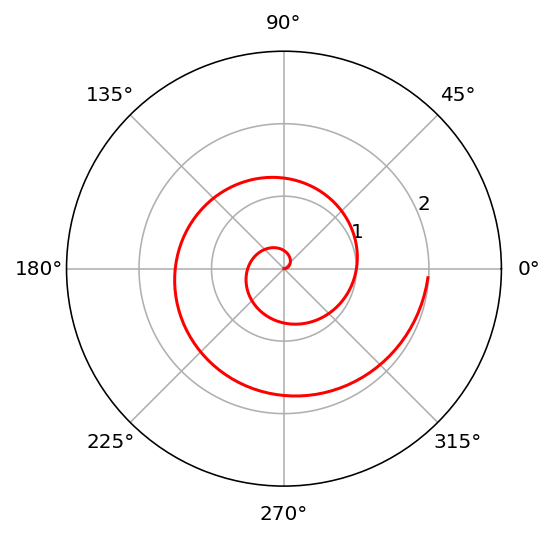

In [2]:
r = np.arange(0, 2, 0.01) # set up an array of radii from 0 to 2 with 0.01 resolution
theta = 2 * np.pi * r # set up an array of theta angles - spiraling outward .. from 0 to 2*2pi = 4pi

# create a polar plot
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r, color='red')
ax.set_rmax(3)
ax.set_rticks([1, 2])  # Less radial ticks
ax.set_rlabel_position(22.5)  # Move radial labels away from plotted line
ax.grid(True)

plt.show()

Just like with xy Cartesian, we will eventually need to consider the area of functions in polar coordinates.

<img src="../images/polar_area.png" width=375 />

Note that the area depends on the radius. Even if we sweep out the same $\Delta r$ and $\Delta \theta$ an area further out from the center is larger:

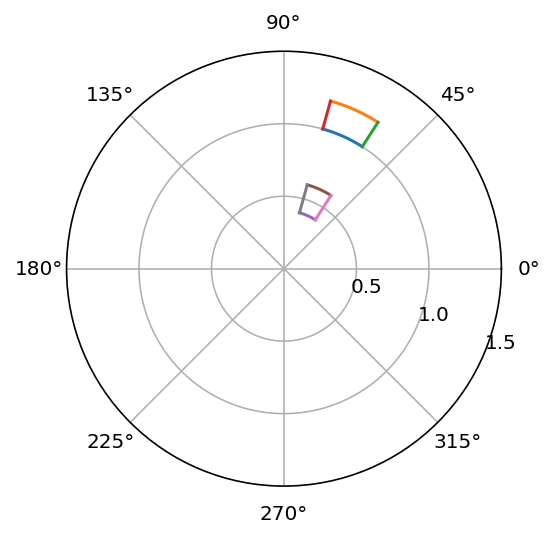

In [3]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################

# first arc at r = 1.0
r1 = np.ones(20)
theta1 = np.linspace(1.0, 1.3, 20)

# second arc at r = 1.2
r2 = np.ones(20) * 1.2
theta2 = np.linspace(1.0, 1.3, 20)

# first radial line at theta = 1.0 radians
r3 = np.linspace(1.0, 1.2, 20)
theta3 = np.ones(20)

# first radial line at theta = 1.3 radians
r4 = np.linspace(1.0, 1.2, 20)
theta4 = np.ones(20) * 1.3

ax = plt.subplot(111, projection='polar')
ax.plot(theta1, r1)
ax.plot(theta2, r2)
ax.plot(theta3, r3)
ax.plot(theta4, r4)

# smaller box
r5 = np.ones(20) * 0.4
r6 = np.ones(20) * 0.6
r7 = np.linspace(0.4, 0.6, 20)
r8 = np.linspace(0.4, 0.6, 20)
ax.plot(theta1, r5)
ax.plot(theta2, r6)
ax.plot(theta3, r7)
ax.plot(theta4, r8)

ax.set_rmax(1.5)
ax.set_rticks([0.5, 1, 1.5])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

plt.show()

Thus the area element will be $r dr d\theta$. While it's not precisely rectangular, the increments are very small and it's a reasonable approximation.

### 3D Cartesian Coordinates

<img src="" width="" />

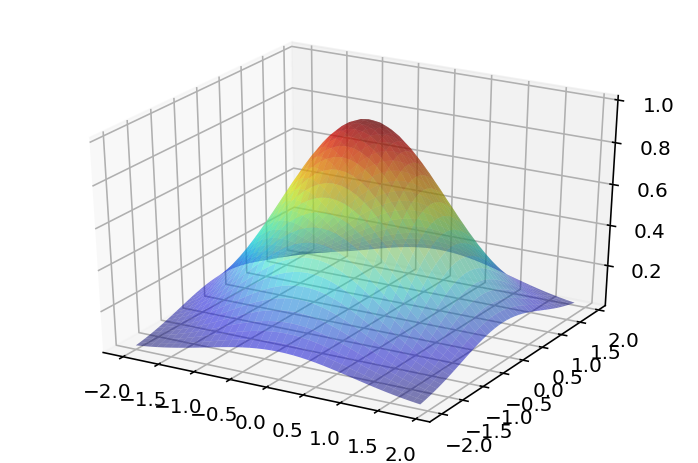

In [4]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################

import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.colors as mcolors
cmap = plt.get_cmap('jet') # pick a red-to-blue color map
fig = plt.figure() # create a figure
ax = fig.add_subplot(1,1,1, projection='3d') # set up some axes for a 3D projection

# We now set up the grid for evaluating our function
#  particularly the angle portion of the spherical coordinates
x = np.arange(-2.0, 2.0, 0.1)
y = np.arange(-2.0, 2.0, 0.1)
X, Y = np.meshgrid(x, y)

Z = np.exp(-0.5 * (np.square(X) + np.square(Y)))

# set up some colors based on the Z range .. from red to blue
norm = mcolors.Normalize(vmin=Z.min(), vmax=Z.max())
# plot the surface
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, 
    facecolors=cmap(norm(Z)),
    linewidth=0, antialiased=True, alpha=0.5) # no lines, smooth graphics, semi-transparent
plt.show()

### 3D Spherical Coordinates

Much like two dimensions we sometimes need to use spherical coordinates — atoms are spherical, after all.

<img src="../images/spherical.png" width="220" />

Where $r$ is the radius from 0 to $\infty$, $\theta$ is the angle down from the z-axis (e.g., think of N/S latitude on the Earth's surface), and $\phi$ is the angle in the $xy$ plane (e.g., think of E/W longitude on the Earth).

We can interconvert xyz and $r\theta\phi$

$$x = r\sin \theta \cos \phi$$
$$y = r\sin \theta \sin \phi$$
$$z = r \cos \theta$$

Or vice-versa:

$$ r = \sqrt{x^2 + y^2 + z^2}$$

The code below might look a little complicated. That's okay. I've added comments for the different sections and each line.

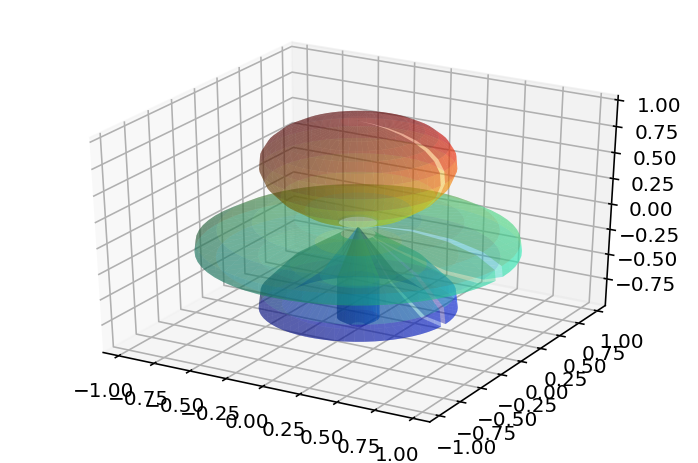

In [5]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################

# import some matplotlib modules for 3D and color scales
import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.colors as mcolors
cmap = plt.get_cmap('jet') # pick a red-to-blue color map
fig = plt.figure() # create a figure
ax = fig.add_subplot(1,1,1, projection='3d') # set up some axes for a 3D projection

# We now set up the grid for evaluating our function
#  particularly the angle portion of the spherical coordinates
theta = np.arange(0, 2*np.pi, 0.1)
phi = np.arange(0, np.pi, 0.1)
THETA, PHI = np.meshgrid(theta, phi)

# here's the function to plot
R = np.abs(np.cos(PHI**2))

# now convert R(phi, theta) to x, y, z coordinates to plot
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)

# set up some colors based on the Z range .. from red to blue
norm = mcolors.Normalize(vmin=Z.min(), vmax=Z.max())
# plot the surface
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, 
    facecolors=cmap(norm(Z)),
    linewidth=0, antialiased=True, alpha=0.4) # no lines, smooth graphics, semi-transparent
plt.show()

The volume element in spherical coordinates is a bit tricky, since the distances depend on the radius and angles:

$$ dV = r^2 \sin \theta dr d\theta d\phi$$

<img src="../images/spherical-volume.png" width="414" />


-------
This notebook is from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>